In [1]:
import pandas as pd

df_jugadores = pd.read_csv('../jugadores_cebollitas.csv')
X = df_jugadores[['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']]

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
componentes = pca.fit_transform(X_scaled)

df_jugadores['PCA1'] = componentes[:, 0]
df_jugadores['PCA2'] = componentes[:, 1]

<Axes: xlabel='PCA1', ylabel='PCA2'>

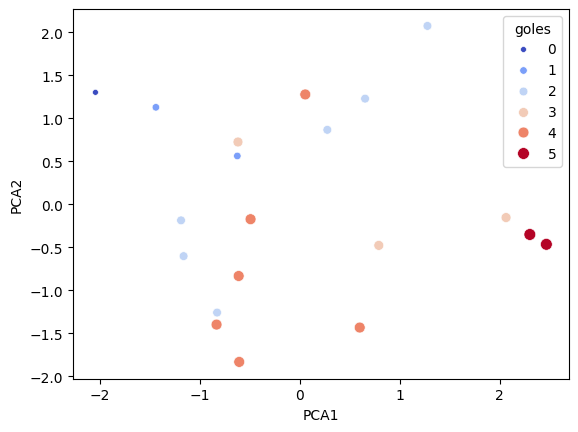

In [5]:
import seaborn as sns

sns.scatterplot(data=df_jugadores, x='PCA1', y='PCA2', hue='goles', size='goles', palette='coolwarm', s=100)

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df_jugadores['cluster'] = kmeans.fit_predict(X_scaled)

<Axes: xlabel='PCA1', ylabel='PCA2'>

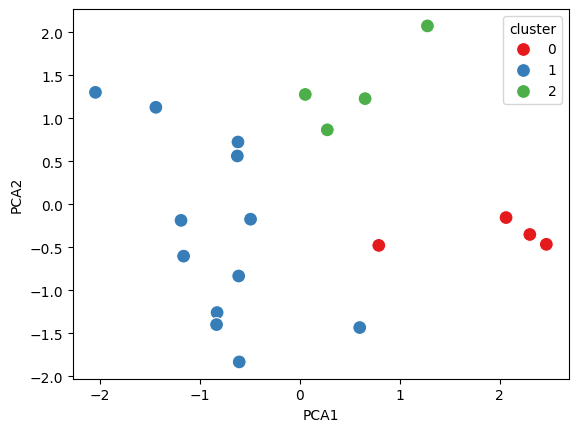

In [7]:
sns.scatterplot(data=df_jugadores, x='PCA1', y='PCA2', hue='cluster', palette='Set1', s=100)

In [9]:
varianza = pca.explained_variance_ratio_

print(f'Varianza explicada por PC1: {varianza[0]:.2%}')
print(f'Varianza explicada por PC2: {varianza[1]:.2%}')
print(f'Varianza total explicada: {varianza.sum():.2%}')

Varianza explicada por PC1: 38.65%
Varianza explicada por PC2: 28.39%
Varianza total explicada: 67.04%


In [ ]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

def explorar_componentes(eje_x, eje_y):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_jugadores, x=eje_x, y=eje_y, hue='cluster', palette='Set2', s=100)
    plt.title(f"Clusters en espacio {eje_x} vs {eje_y}")
    plt.grid(True)
    plt.show()

widgets.interactive(explorar_componentes, eje_x=['PCA1', 'PCA2'], eje_y=['PCA1', 'PCA2'])

interactive(children=(Dropdown(description='eje_x', options=('PCA1', 'PCA2'), value='PCA1'), Dropdown(descript…